In [870]:
import numpy as np
from skimage.measure import block_reduce
import skimage
import scipy.io
import os
from IPython.core.debugger import set_trace
from skimage.transform import resize

In [871]:
SimulateData  = True          # If False denotes training the CNN with SEGSaltData
ReUse         = False         # If False always re-train a network 
DataDim       = [800,101]    # Dimension of original one-shot seismic data
data_dsp_blk  = (2,1)         # Downsampling ratio of input
ModelDim      = [101,101]     # Dimension of one velocity model
label_dsp_blk = (1,1)         # Downsampling ratio of output
dh            = 10            # Space interval 


In [872]:
Epochs        = 1       # Number of epoch
TrainSize1     = 500   # Number of training set
TrainSize2     = 200    # Number in training set
TestSize      = 100      # Number of testing set
TestBatchSize = 1

In [873]:
BatchSize         = 10      # Number of batch size
LearnRate         = 1e-3      # Learning rate
Nclasses          = 1         # Number of output channels
Inchannels        = 10        # Number of input channels, i.e. the number of shots
SaveEpoch         = 20        
DisplayStep       = 2         # Number of steps till outputting stats

In [874]:
tagD0 = 'georec'
tagV0 = 'vmodel'
tagD1 = 'Rec'
tagV1 = 'vmodel'
datafilename  = tagD0
dataname      = tagD1
truthfilename = tagV0
truthname     = tagV1
main_dir   = '/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/'
data_dir    = main_dir + 'data/' 
train_data_dir  = data_dir  + 'train_data/'        # Replace your training data path here
test_data_dir   = data_dir  + 'test_data/'         # Replace your testing data path here
# Define directory for simulate data and SEG data respectively
if SimulateData:
    train_data_dir  = train_data_dir + 'SimulateData/'
    test_data_dir   = test_data_dir  + 'SimulateData/'
else:
    train_data_dir  = train_data_dir + 'SEGSaltData/'
    test_data_dir   = test_data_dir  + 'SEGSaltData/'

## Create Results and Models path
if os.path.exists('./results/') and os.path.exists('./models/'):
    results_dir     = main_dir + 'results/' 
    models_dir      = main_dir + 'models/'
else:
    os.makedirs('./results/')
    os.makedirs('./models/')
    results_dir     = main_dir + 'results/'
    models_dir      = main_dir + 'models/'
if SimulateData:
    results_dir     = results_dir + 'SimulateResults/'
    models_dir      = models_dir  + 'SimulataModel/'
else:
    results_dir     = results_dir + 'SEGSaltResults/'
    models_dir      = models_dir  + 'SEGSaltModel/'
if os.path.exists(results_dir) and os.path.exists(models_dir):  
    results_dir     = results_dir
    models_dir      = models_dir 
else:
    os.makedirs(results_dir)
    os.makedirs(models_dir)
    results_dir     = results_dir
    models_dir      = models_dir
# Create Model name
if SimulateData:
    tagM = 'Simulate'
else:
    tagM = 'SEGSalt'
tagM0 = '_FCNVMBModel'
tagM1 = '_TrainSize' + str(TrainSize)
tagM2 = '_Epoch'     + str(Epochs)
tagM3 = '_BatchSize' + str(BatchSize)
tagM4 = '_LR'        + str(LearnRate)

modelname = tagM+tagM0+tagM1+tagM2+tagM3+tagM4
# Change here to set the model as the pre-trained initialization
premodelname = 'Simulate_FCNVMBModel_TrainSize1600_Epoch100_BatchSize10_LR0.001' 

NameError: name 'TrainSize' is not defined

In [868]:
# downsampling function by taking the middle value
def decimate(a,axis):
    idx = np.round((np.array(a.shape)[np.array(axis).reshape(1,-1)]+1.0)/2.0-1).reshape(-1)
    downa = np.array(a)[:,:,idx[0].astype(int),idx[1].astype(int)]
    return downa

In [607]:
os.system('rm -rf /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/trainA')
os.system('rm -rf /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/trainB')
os.system('rm -rf /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/trainC')

os.system('mkdir /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/trainA')
os.system('mkdir /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/trainB')
os.system('mkdir /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/trainC')



0

In [608]:
start = 1
train_size1 = TrainSize1
train_size2 = TrainSize2
in_channels = Inchannels
model_dim = ModelDim
kk = 1

for i in range(start,start+train_size1):
        
    kk = kk + 1
    filename_seis = train_data_dir+'georec_train/'+datafilename+str(i)
    print(filename_seis)
        # Load .mat data
    data1_set = scipy.io.loadmat(filename_seis)
        #data1_set = np.float32(data1_set[str(dataname)].reshape([data_dim[0],data_dim[1],in_channels]))
    data1_set = np.float32(data1_set[str(dataname)])
        # Change the dimention [h, w, c] --> [c, h, w]
    for k in range (0,in_channels):
        data11_set     = np.float32(data1_set[:,:,k])
        data11_set     = np.float32(data11_set)
        # Data downsampling
        # note that the len(data11_set.shape)=len(block_size.shape)=2
        #data11_set     = block_reduce(data11_set,block_size=data_dsp_blk,func=decimate)
        #data11_set     = data11_set[1:2000:5,:]
        data11_set     = np.expand_dims(data11_set,axis=0)
        data_dsp_dim   = data11_set.shape
        #data11_set     = data11_set.reshape(1,data_dsp_dim[0]*data_dsp_dim[1])
        if k==0:
            train1_set = data11_set
        else:
            train1_set = np.append(train1_set,data11_set,axis=0)
    filename_label     = train_data_dir+'vmodel_train/'+truthfilename+str(i)
    data2_set          = scipy.io.loadmat(filename_label)
    data2_set          = data2_set[str(truthname)]
    #data2_set[np.arange(len(data2_set)), data2_set.argmin(axis=1)] = 2000
    data2_set[(data2_set==np.min(data2_set))] = 2000
    data2_set          = resize(data2_set,(101,101))
 

        # Label downsampling
    #data2_set          = block_reduce(data2_set,block_size=label_dsp_blk,func=np.max)
    label_dsp_dim      = data2_set.shape
    #data2_set          = data2_set.reshape(1,label_dsp_dim[0]*label_dsp_dim[1])
    data2_set          = np.float32(data2_set)
    #if i==start:
    #    train_set      = train1_set
    #    label_set      = data2_set
    #else:
    #    train_set      = np.append(train_set,train1_set,axis=0)
    #    label_set      = np.append(label_set,data2_set,axis=0)
        
    A = train1_set
    B = data2_set
    C = scipy.ndimage.gaussian_filter(B,sigma=10)
    file = open('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/trainA/'+str(kk)+'.npy','wb')
    np.save(file,A)
    file.close()
    file = open('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/trainB/'+str(kk)+'.npy','wb')
    np.save(file,B)
    file.close()
    file = open('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/trainC/'+str(kk)+'.npy','wb')
    np.save(file,C)
    file.close()
    #file = open('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/trainB/'+str(kk)+'.npy','wb')
    #np.save(file,C)
    #file.close()
    
            
#train_set = train_set.reshape((train_size,in_channels,data_dsp_dim[0]*data_dsp_dim[1]))
#label_set = label_set.reshape((train_size,1,label_dsp_dim[0]*label_dsp_dim[1]))
    


/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec1
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec2
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec3
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec4
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec5
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec6
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec7
/disk/student/adhara/Fall20

/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec60
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec61
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec62
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec63
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec64
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec65
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec66
/disk/student/adhara

/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec121
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec122
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec123
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec124
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec125
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec126
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec127
/disk/student

/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec182
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec183
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec184
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec185
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec186
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec187
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec188
/disk/student

/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec241
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec242
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec243
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec244
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec245
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec246
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec247
/disk/student

/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec303
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec304
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec305
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec306
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec307
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec308
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec309
/disk/student

/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec362
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec363
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec364
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec365
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec366
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec367
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec368
/disk/student

/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec424
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec425
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec426
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec427
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec428
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec429
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec430
/disk/student

/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec485
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec486
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec487
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec488
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec489
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec490
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec491
/disk/student

array([[2000.    , 2000.    , 2000.    , ..., 2000.    , 2000.    ,
        2000.    ],
       [2000.    , 2000.    , 2000.    , ..., 2000.    , 2000.    ,
        2000.    ],
       [2000.    , 2000.    , 2000.    , ..., 2000.    , 2000.    ,
        2000.    ],
       ...,
       [2904.5103, 2904.5103, 2904.5103, ..., 2904.5103, 2904.5103,
        2904.5103],
       [2904.5103, 2904.5103, 2904.5103, ..., 2904.5103, 2904.5103,
        2904.5103],
       [2904.5103, 2904.5103, 2904.5103, ..., 2904.5103, 2904.5103,
        2904.5103]], dtype=float32)

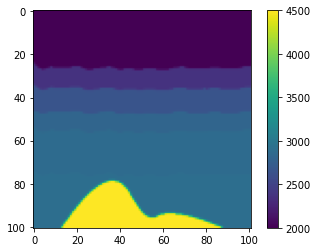

In [609]:
plt.imshow(data2_set)
plt.colorbar()
data2_set

In [610]:
import matplotlib.pyplot as plt
np.shape(A)

(10, 800, 101)

In [611]:
start = 1
train_size1 = TrainSize1
train_size2 = TrainSize2
test_size = TestSize
in_channels = Inchannels
model_dim = ModelDim
#kk = 1

for i in range(start+train_size1+test_size,start+train_size1+test_size+train_size2):
        
    kk = kk + 1
    filename_seis = train_data_dir+'georec_train/'+datafilename+str(i)
    print(filename_seis)
        # Load .mat data
    data1_set = scipy.io.loadmat(filename_seis)
        #data1_set = np.float32(data1_set[str(dataname)].reshape([data_dim[0],data_dim[1],in_channels]))
    data1_set = np.float32(data1_set[str(dataname)])
        # Change the dimention [h, w, c] --> [c, h, w]
    for k in range (0,in_channels):
        data11_set     = np.float32(data1_set[:,:,k])
        data11_set     = np.float32(data11_set)
        # Data downsampling
        # note that the len(data11_set.shape)=len(block_size.shape)=2
        #data11_set     = block_reduce(data11_set,block_size=data_dsp_blk,func=decimate)
        #data11_set     = data11_set[1:2000:5,:]
        data11_set     = np.expand_dims(data11_set,axis=0)
        data_dsp_dim   = data11_set.shape
        #data11_set     = data11_set.reshape(1,data_dsp_dim[0]*data_dsp_dim[1])
        if k==0:
            train1_set = data11_set
        else:
            train1_set = np.append(train1_set,data11_set,axis=0)
    filename_label     = train_data_dir+'vmodel_train/'+truthfilename+str(i)
    data2_set          = scipy.io.loadmat(filename_label)
    data2_set          = data2_set[str(truthname)]
    data2_set[(data2_set==np.min(data2_set))] = 2000
    data2_set          = resize(data2_set,(101,101))

        # Label downsampling
    #data2_set          = block_reduce(data2_set,block_size=label_dsp_blk,func=np.max)
    label_dsp_dim      = data2_set.shape
    #data2_set          = data2_set.reshape(1,label_dsp_dim[0]*label_dsp_dim[1])
    data2_set          = np.float32(data2_set)
    #if i==start:
    #    train_set      = train1_set
    #    label_set      = data2_set
    #else:
    #    train_set      = np.append(train_set,train1_set,axis=0)
    #    label_set      = np.append(label_set,data2_set,axis=0)
        
    A = train1_set
    B = data2_set
    C = scipy.ndimage.gaussian_filter(B,sigma=10)
    file = open('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/trainA/'+str(kk)+'.npy','wb')
    np.save(file,A)
    file.close()
    file = open('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/trainB/'+str(kk)+'.npy','wb')
    np.save(file,B)
    file.close()
    file = open('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/trainC/'+str(kk)+'.npy','wb')
    np.save(file,C)
    file.close()
            
#train_set = train_set.reshape((train_size,in_channels,data_dsp_dim[0]*data_dsp_dim[1]))
#label_set = label_set.reshape((train_size,1,label_dsp_dim[0]*label_dsp_dim[1]))
    

/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec601
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec602
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec603
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec604
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec605
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec606
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec607
/disk/student

/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec662
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec663
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec664
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec665
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec666
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec667
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec668
/disk/student

/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec724
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec725
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec726
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec727
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec728
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec729
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec730
/disk/student

/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec785
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec786
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec787
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec788
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec789
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec790
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec791
/disk/student

FileNotFoundError: [Errno 2] No such file or directory: '/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec800.mat'

array([[2000.   , 2000.   , 2000.   , ..., 2000.   , 2000.   , 2000.   ],
       [2000.   , 2000.   , 2000.   , ..., 2000.   , 2000.   , 2000.   ],
       [2000.   , 2000.   , 2000.   , ..., 2000.   , 2000.   , 2000.   ],
       ...,
       [3820.964, 3820.964, 3820.964, ..., 3820.964, 3820.964, 3820.964],
       [3820.964, 3820.964, 3820.964, ..., 3820.964, 3820.964, 3820.964],
       [3820.964, 3820.964, 3820.964, ..., 3820.964, 3820.964, 3820.964]],
      dtype=float32)

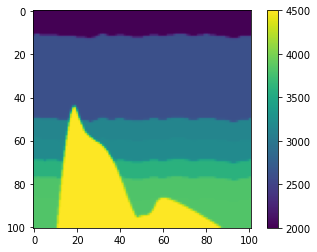

In [612]:
plt.imshow(B)
plt.colorbar()
B

In [613]:
os.system('rm -rf /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/testA')
os.system('rm -rf /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/testB')
os.system('rm -rf /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/testC')

os.system('mkdir /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/testA')
os.system('mkdir /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/testB')
os.system('mkdir /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/testC')

0

In [614]:
start = 1
test_size = TestSize
in_channels = Inchannels
model_dim = ModelDim
kk = 0
realization = 50
for i in range(start+train_size1,start+train_size1+test_size):
    kk = kk + 1
    filename_seis = train_data_dir+'georec_train/'+datafilename+str(i)
    print(filename_seis)
        # Load .mat data
    data1_set = scipy.io.loadmat(filename_seis)
        #data1_set = np.float32(data1_set[str(dataname)].reshape([data_dim[0],data_dim[1],in_channels]))
    data1_set = np.float32(data1_set[str(dataname)])
        # Change the dimention [h, w, c] --> [c, h, w]
    for k in range (0,in_channels):
        data11_set     = np.float32(data1_set[:,:,k])
        data11_set     = np.float32(data11_set)
        # Data downsampling
        # note that the len(data11_set.shape)=len(block_size.shape)=2
        #data11_set     = block_reduce(data11_set,block_size=data_dsp_blk,func=decimate)
        #data11_set     = data11_set[1:2000:5,:]
        data11_set     = np.expand_dims(data11_set,axis=0)
        data_dsp_dim   = data11_set.shape
        #data11_set     = data11_set.reshape(1,data_dsp_dim[0]*data_dsp_dim[1])
        if k==0:
            train1_set = data11_set
        else:
            train1_set = np.append(train1_set,data11_set,axis=0)
    filename_label     = train_data_dir+'vmodel_train/'+truthfilename+str(i)
    data2_set          = scipy.io.loadmat(filename_label)
    data2_set          = data2_set[str(truthname)]
    data2_set[(data2_set==np.min(data2_set))] = 2000
    data2_set          = resize(data2_set,(101,101))
    
 
        # Label downsampling
    #data2_set          = block_reduce(data2_set,block_size=label_dsp_blk,func=np.max)
    label_dsp_dim      = data2_set.shape
    #data2_set          = data2_set.reshape(1,label_dsp_dim[0]*label_dsp_dim[1])
    data2_set          = np.float32(data2_set)
    #if i==start:
    #    train_set      = train1_set
    #    label_set      = data2_set
    #else:
    #    train_set      = np.append(train_set,train1_set,axis=0)
    #    label_set      = np.append(label_set,data2_set,axis=0)
        
    A = train1_set
    B = data2_set
    C = scipy.ndimage.gaussian_filter(B,sigma=10)
    file = open('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/testA/'+str(kk)+'.npy','wb')
    np.save(file,A)
    file.close()
    file = open('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/testB/'+str(kk)+'.npy','wb')
    np.save(file,B)
    file.close()
    file = open('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/testC/'+str(kk)+'.npy','wb')
    np.save(file,C)
    file.close()
            
#train_set = train_set.reshape((train_size,in_channels,data_dsp_dim[0]*data_dsp_dim[1]))
#label_set = label_set.reshape((train_size,1,label_dsp_dim[0]*label_dsp_dim[1]))
    


/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec501
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec502
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec503
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec504
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec505
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec506
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec507
/disk/student

/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec562
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec563
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec564
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec565
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec566
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec567
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec568
/disk/student

2000.0

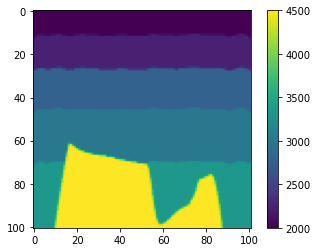

In [615]:
plt.imshow(B)
plt.colorbar()
np.min(B)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
# Define a plot function to plot two slices. Made some modifications to fit a colorbar to it.
def plot_two_slices(data1,data2,title1='',title2=''):
    aspect = 20
    pad_fraction = 0.5
    
    #gs = plt.GridSpec(1, 1)
    fig,ax = plt.subplots(1,2, figsize = (20,40));

    # Plot the first section
    im1 = ax[0].imshow(np.squeeze(data1))

    ax[0].set(title=title1)
    divider = make_axes_locatable(ax[0])
    width = axes_size.AxesY(ax[0], aspect=1./aspect)
    pad = axes_size.Fraction(pad_fraction, width)
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.colorbar(im1, cax=cax)
    
    #Plot the second section
    im2 = ax[1].imshow(np.squeeze(data2))

    ax[1].set(title=title2)
    divider = make_axes_locatable(ax[1])
    width = axes_size.AxesY(ax[1], aspect=1./aspect)
    pad = axes_size.Fraction(pad_fraction, width)
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.colorbar(im2, cax=cax)
    
    plt.subplots_adjust(wspace = 0.2)
    #plt.colorbar(im, ax=ax)
    plt.show()

In [898]:
from skimage.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim
tex = 9
realization = 100
def plotRealVel(starting):
    
    #create figure
    fig = plt.figure(figsize=(9,9))
    #ax.axis('off')
    
    rows = 3
    columns = 3
    
    for i in range(tex):
        ax = fig.add_subplot(rows,columns,i+1)
        #kk=starting+i
        filename='/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Output0/'+str(starting+i+1)+'_real_BT.npy'
        mat=np.load(filename)
        mat = mat*1000
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(np.squeeze(mat))
        plt.colorbar()
        plt.axis('off')
        plt.tight_layout()
        #ax.box(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.axis('off')
        
        
def plotFakeVel(starting):
    
    #create figure
    fig = plt.figure(figsize=(9,9))
    
    rows = 3
    columns = 3
    
    for i in range(tex):
        ax = fig.add_subplot(rows,columns,i+1)
        #kk=starting+i
        filename='/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Output0/'+str(starting+i+1)+'_fake_BT.npy'
        mat=np.load(filename)
        mat = mat*10
        filename='/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Output0/'+str(starting+i+1)+'_real_BT.npy'
        real=np.load(filename)
        real = real*10
        mat = np.squeeze(mat)
        real = np.squeeze(real)
        mat = np.clip(mat,np.min(real),np.max(real))
        #print("shape of mat :", np.shape(mat))
        #print("shape of real :", np.shape(real))
        mse = mean_squared_error(mat,real)
        ssim1 = ssim(mat,real)
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(np.squeeze(mat),cmap='jet',vmin=np.min(real),vmax=np.max(real))
        plt.colorbar()
        plt.axis('off')
        plt.tight_layout()
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.axis('off')
        ax.set_title('SSIM:'+"%0.2f"%ssim1+' MSE:'+"%0.3f"%mse)
        
        
        
def plotFakeVelNewMean(starting):
    
    #create figure
    fig1 = plt.figure(figsize=(9,9))
    #fig2 = plt.figure(figsize=(15,15))
    
    rows = 3
    columns = 3
    matVel = np.zeros((realization,tex,70,70))
    real = np.zeros((tex,70,70))
    for k in range(realization):
        filename='/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Output'+str(k)+'/'    
        for i in range(tex):
            #fig.add_subplot(rows,columns,i+1)
            #kk=starting+i
            onefile = filename+str(starting+i+1)+'_fake_BT.npy'
            mat=np.load(onefile)
            mat = mat
            matVel[k,i,:,:] = mat*1000
            
    for i in range(tex):
        filename ='/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Output0/'
        onefile = filename+str(starting+i+1)+'_real_BT.npy'
        mat = np.load(onefile)
        mat = np.squeeze(mat)
        real[i,:,:] = mat*1000
        
            
    mean = np.mean(matVel,axis=0)
    std = np.std(matVel,axis=0)
    
 
    #plt.imshow(mean[0,:,:])
    
    #print("mean :", mean[0,:,:])
    
    for i in range(tex):
        ax = fig1.add_subplot(rows,columns,i+1)
        mse = mean_squared_error(mean[i,:,:],real[i,:,:])
        ssim1 = ssim(mean[i,:,:],real[i,:,:])
    #    #kk=starting+i
        plt.imshow(mean[i,:,:],vmin=3000,vmax=6000)
        plt.colorbar()
        plt.axis('off')
        plt.tight_layout()
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.axis('off')
        ax.set_title('SSIM:'+"%0.2f"%ssim1+' MSE:'+"%0.3f"%mse)
        

def plotFakeVelNewStd(starting):
    
    #create figure
    fig1 = plt.figure(figsize=(9,9))
    #fig2 = plt.figure(figsize=(15,15))
    
    rows = 3
    columns = 3
    matVel = np.zeros((realization,tex,101,101))
    for k in range(realization):
        filename='/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Output'+str(k)+'/'    
        for i in range(tex):
            #fig.add_subplot(rows,columns,i+1)
            #kk=starting+i
            onefile = filename+str(starting+i+1)+'_fake_BT.npy'
            mat=np.load(onefile)
            mat = mat
            matVel[k,i,:,:] = mat
            
    mean = np.mean(matVel,axis=0)
    #std = np.std(matVel,axis=0)
    
    #plt.imshow(mean[0,:,:])
    
    #print("mean :", mean[0,:,:])
    
    for i in range(tex):
        ax = fig1.add_subplot(rows,columns,i+1)
    #    #kk=starting+i
        po = matVel[:,i,:,:]
        std1 = np.std(po,axis=0)
        #std = np.std(matVel[:,i,:,:],axis=0)
        plt.imshow(std1)
        plt.colorbar()
        plt.axis('off')
        plt.tight_layout()
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.axis('off')
        
def plotOneVel(i):
        
    #create figure
    fig1 = plt.figure(figsize=(9,9))
    #fig2 = plt.figure(figsize=(5,5))
    #fig2 = plt.figure(figsize=(15,15))
    
    filename='/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Output'+str(0)+'/'    
        #fig.add_subplot(rows,columns,i+1)
        #kk=starting+i
    onefilef = filename+str(i)+'_real_BT.npy'
    matt=np.load(onefilef)
    matt = matt*1000
    #matVel[k,:,:] = mat

    rows = 3
    columns = 1
    matVel = np.zeros((realization,70,70))
    for k in range(realization):
        filename='/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Output'+str(k)+'/'    
        #fig.add_subplot(rows,columns,i+1)
        #kk=starting+i
        onefilef = filename+str(i)+'_fake_BT.npy'
        mat=np.load(onefilef)
        mat = mat
        matVel[k,:,:] = mat*1000
        
    mean = np.mean(matVel, axis=0)
    std = np.std(matVel, axis=0)
    
    ax = fig1.add_subplot(rows,columns,3)
    #kk=starting+i
    plt.imshow(std[:,:])
    np.save('stdvaenormalizing'+str(i)+'.npy',std)
    plt.colorbar()
    plt.axis('off')
    plt.tight_layout()
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.axis('off')
        
    ax = fig1.add_subplot(rows,columns,2)
    #kk=starting+i
    plt.imshow(mean[:,:],vmin=3000,vmax=6000)
    np.save('meanvaenormalizing'+str(i)+'.npy',mean)
    plt.colorbar()
    plt.axis('off')
    plt.tight_layout()
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.axis('off')
    
    ax = fig1.add_subplot(rows,columns,1)
    #kk=starting+i
    plt.imshow(np.squeeze(matt),vmin=3000,vmax=6000)
    np.save('truevaenormalizing'+str(i)+'.npy',mean)         
    plt.colorbar()
    plt.axis('off')
    plt.tight_layout()
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.axis('off')
 
        #fig.add_subplot(rows, columns, i+1)
        #plt.imshow(np.squeeze(mat))
        #plt.colorbar()
        #plt.axis('off')
        #plt.tight_layout()
        
        
def plotOneRealFalse(i):
        
    #create figure
    fig1 = plt.figure(figsize=(9,9))
    #fig2 = plt.figure(figsize=(5,5))
    #fig2 = plt.figure(figsize=(15,15))
    
    filename='/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Output'+str(0)+'/'    
        #fig.add_subplot(rows,columns,i+1)
        #kk=starting+i
    onefilef = filename+str(i)+'_real_BT.npy'
    matt=np.load(onefilef)
    matt = np.squeeze(matt)
    matt = matt*10
    #matVel[k,:,:] = mat

    rows = 1
    columns = 2
    #matVel = np.zeros((15,101,101))
    for k in range(1):
        filename='/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Output'+str(k)+'/'    
        #fig.add_subplot(rows,columns,i+1)
        #kk=starting+i
        onefilef = filename+str(i)+'_fake_BT.npy'
        mat=np.load(onefilef)
        mat = np.squeeze(mat)
        mat = mat*10
        #matVel[k,:,:] = mat
        
  
    ax = fig1.add_subplot(rows,columns,1)
    #kk=starting+i
    im = plt.imshow(matt, vmin=np.min(matt), vmax=np.max(matt),cmap='jet')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    #plt.axis('off')
    plt.tight_layout()
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.axis('off')
        
    ax = fig1.add_subplot(rows,columns,2)
    #kk=starting+i
    im = plt.imshow(mat,vmin=np.min(matt), vmax=np.max(matt),cmap='jet')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    #plt.axis('off')
    plt.tight_layout()
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.axis('off')
        #fig.add_subplot(rows, columns, i+1)
        #plt.imshow(np.squeeze(mat))
        #plt.colorbar()
        #plt.axis('off')
        #plt.tight_layout()
        

In [899]:
plotOneVel(10)

FileNotFoundError: [Errno 2] No such file or directory: '/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Output0/10_real_BT.npy'

<Figure size 648x648 with 0 Axes>

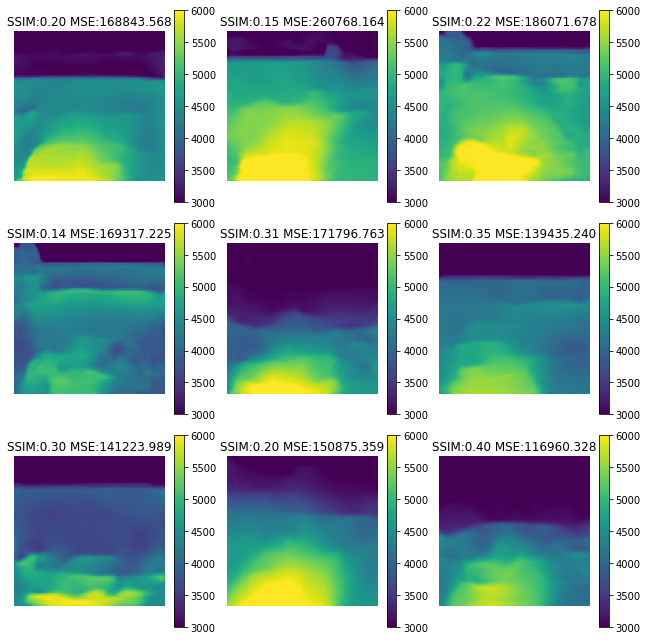

In [901]:
plotFakeVelNewMean(10)

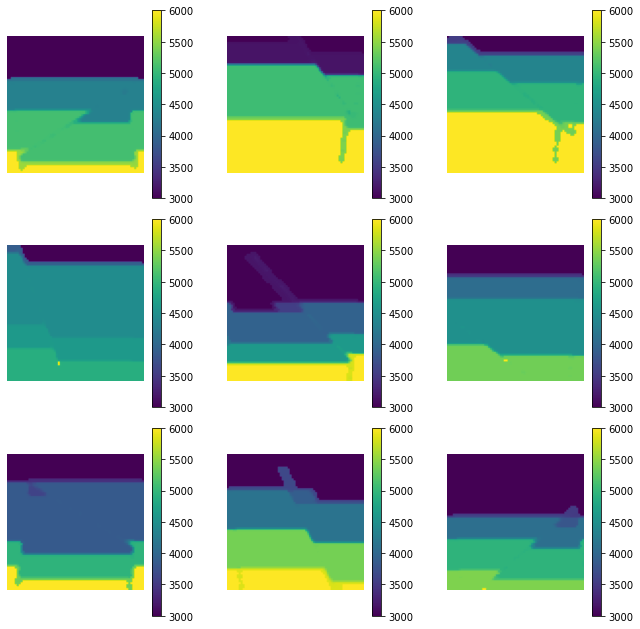

In [902]:
plotRealVel(10)

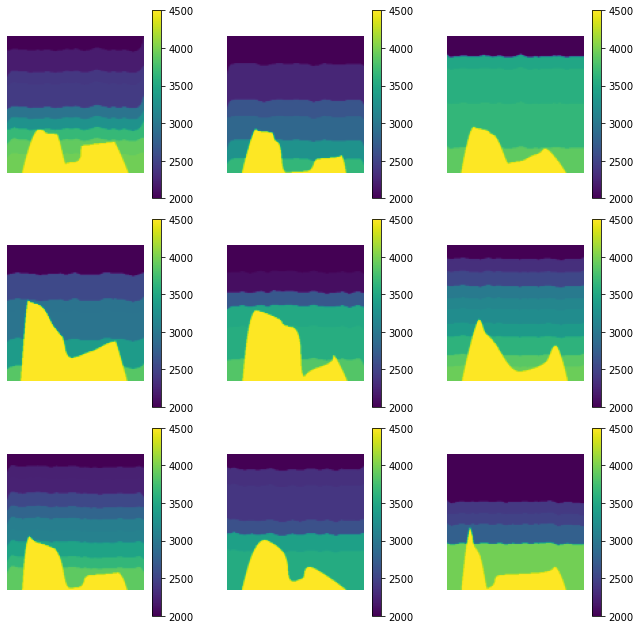

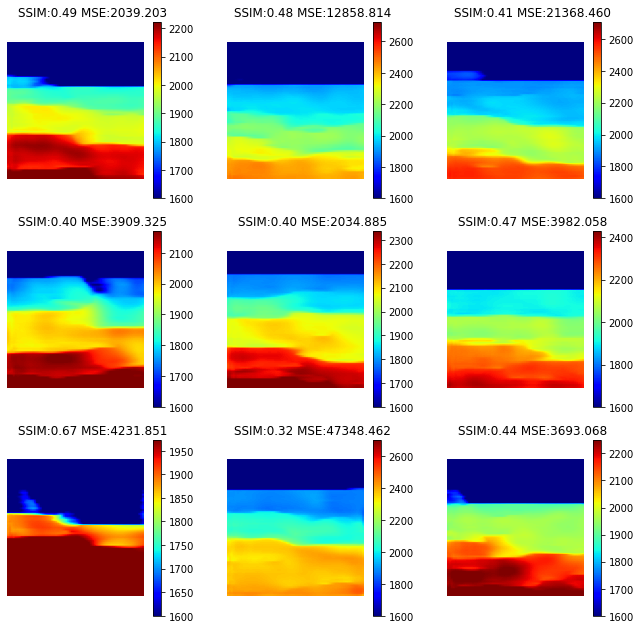

In [94]:
plotFakeVel(41)

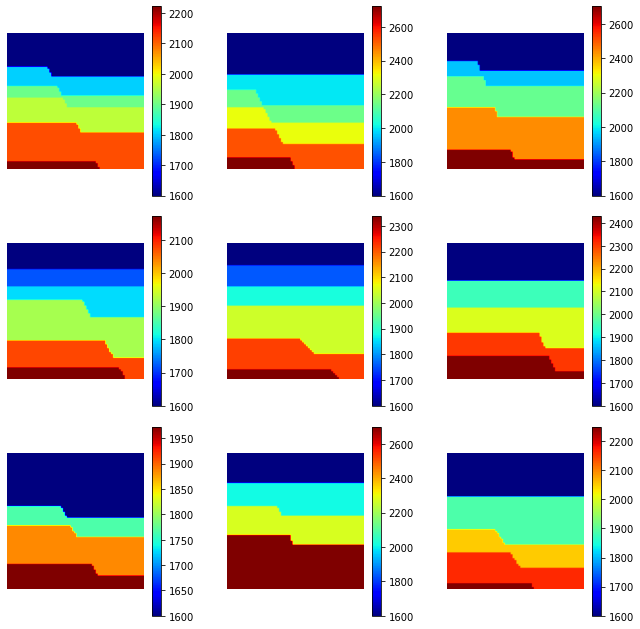

In [95]:
plotRealVel(41)

#### real = np.load('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Output/_real_BT.npy')
fake = np.load('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Output/1_fake_BT.npy')
real = real*(4500-2000)+2000
fake = fake*(4500-2000)+2000
plot_two_slices(real,fake,title1='real',title2='fake')

In [ ]:
real = np.load('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Output/30_real_BT.npy')
fake = np.load('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Output/30_fake_BT.npy')
real = real*(4500-2000)+2000
fake = fake*(4500-2000)+2000
plot_two_slices(real,fake,title1='real',title2='fake')

In [ ]:
data = np.load('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/trainA/30.npy')
np.shape(data)


In [ ]:
plt.figure(figsize=(12, 3))
plt.imshow(np.squeeze(data[7,:,:]),vmin=-.05,vmax=.05, aspect='auto')
plt.title('data')

In [ ]:
po1 = np.load('/glb/hou/pt.sgs/data/ml_ai_us/4d/usadh7/github_repos/FCNVMB-Deep-learning-based-seismic-velocity-model-building/ftout1.npy')
po2 = np.load('/glb/hou/pt.sgs/data/ml_ai_us/4d/usadh7/github_repos/FCNVMB-Deep-learning-based-seismic-velocity-model-building/ftout2.npy')

In [ ]:
plot_two_slices(po1,po2,title1='t1',title2='t2')

In [ ]:
plt.imshow(po1-po2)

In [846]:
with open('/disk/student/adhara/Fall2021/PhysicsBasedFWI/checkpoints/Auto2SaltPhy64/loss_log.txt') as f:
    lines = f.readlines()
epochs = []
mls = []
vls = []
kls = []
for i in range(1,81):
    #print("i:",i)
    po = lines[i].split(')')
    string1 = po[0][1:]
    string2 = po[1]
    result1 = dict((a.strip(), int(b.strip()))  
                         for a, b in (element.split(':')  
                                      for element in string1.split(', ')))  
    epoch = int(result1['epoch'])
    result2 = string2.split(' ')
    modelloss = float(result2[2])
    validationloss = float(result2[6])
    klloss = float(result2[9])
    epochs = np.append(epochs,epoch)
    mls = np.append(mls,modelloss)
    vls = np.append(vls,validationloss)
    kls = np.append(kls,klloss)

/disk/student/adhara/anaconda3/envs/deepwave2/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


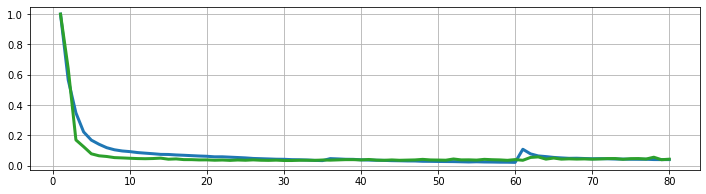

In [847]:
#plt.plot(epochs,mls)
plt.figure(figsize=(12, 3))
plt.plot(epochs,mls/np.max(mls),linewidth=3.0)
plt.plot(epochs,kls/np.max(kls),linewidth=3.0)
plt.plot(epochs,vls/np.max(vls),linewidth=3.0)
plt.grid()

In [718]:
po

['(epoch: 200, iters: 704',
 ' Modelloss: 614.135 Dataloss: 0.000 Validationloss: 67308.611 KL divergence: 206.961 \n']

In [719]:
result2

['',
 'Modelloss:',
 '614.135',
 'Dataloss:',
 '0.000',
 'Validationloss:',
 '67308.611',
 'KL',
 'divergence:',
 '206.961',
 '\n']